```
Generative AI with Python, by Fernando Amaral
```

# Setup

In [ ]:
#gpu
!pip install diffusers transformers safetensors accelerate

In [2]:
import requests
from io import BytesIO
from PIL import Image
from diffusers import AutoPipelineForImage2Image
import matplotlib.pyplot as plt
import torch

# Diagram

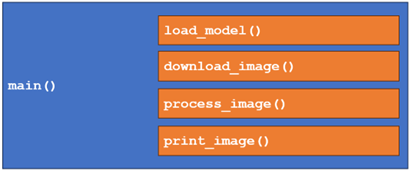

# Code

In [3]:
def load_model(pretrained_model_or_path, device="cuda"):
    pipeline = AutoPipelineForImage2Image.from_pretrained(
        pretrained_model_or_path=pretrained_model_or_path,
        use_safetensors=True,
        safety_checker=None
    ).to(device)
    return pipeline

In [4]:
def download_image(url):
    response = requests.get(url)
    image = Image.open(BytesIO(response.content)).convert("RGB") # Converts the text data from response to image.
    return image

In [5]:
def process_image(pipeline, prompt, source_image, num_inference_steps):
    processed_image = pipeline(prompt, source_image, num_inference_steps=num_inference_steps).images[0]
    return processed_image

In [6]:
def print_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [7]:
def main():
    pretrained_model_or_path = "runwayml/stable-diffusion-v1-5"
    prompt = "The woman when she was a child."
    num_inference_steps = 50
    url = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg/800px-Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg"

    pipeline = load_model(pretrained_model_or_path)
    source_image = download_image(url)
    processed_image = process_image(pipeline, prompt, source_image, num_inference_steps)
    print_image(processed_image)


# Execution

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_img2img.StableDiffusionImg2ImgPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/40 [00:00<?, ?it/s]

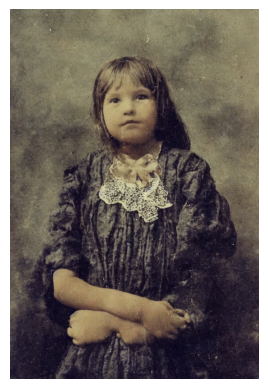

In [8]:
main()